# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [3]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.benchmark_dataset import BenchmarkDataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach
from src.base.experiment.tasks.task import ICAO_REQ, MNIST_TASK, CELEB_A_TASK, CIFAR_10_TASK, FASHION_MNIST_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [4]:
N_TRIALS = 3
NAS_APPROACH = NAS_MTLApproach.APPROACH_2
NAS_APPROACH_STR = 'nas_approach_2'
N_CHILD_EPOCHS = 1
N_CHILD_EPOCHS_STR = '5_child_epochs'
CONTROLLER_EPOCHS = 50
N_EPOCHS = 3

DATASET = BenchmarkDataset.MNIST
TASKS = list(MNIST_TASK)

kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': f'{NAS_APPROACH.value} with {DATASET.value["name"].upper()} dataset with {N_TRIALS} trials and patience and {N_CHILD_EPOCHS} child epoch',
        'tags': ['nas', f'{NAS_APPROACH_STR}', 'benchmark', f'{DATASET.value["name"]}', f'{N_CHILD_EPOCHS_STR}'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': NAS_APPROACH,
        'benchmarking': {
            'use_benchmark_data': True,
            'benchmark_dataset': DATASET,
            'tasks': TASKS
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': False,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.MOBILENET_V2,
        'batch_size': 32,
        'n_epochs': N_EPOCHS,
        'early_stopping': 5,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {
        'max_blocks_per_branch': 5,
        'n_child_epochs': N_CHILD_EPOCHS,
        'controller_epochs': CONTROLLER_EPOCHS,
        'controller_batch_size': 32,
        'n_trials': N_TRIALS
    }
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 110776
Process ID: 111132
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'approach_2 with MNIST dataset with 3 trials '
                               'and patience and 1 child epoch',
                'name': 'neural_arch_search',
                'src_files': ['../src/**/*.py'],
                'tags': ['nas',
                         'nas_approach_2',
                         'benchmark',
                         'mnist',
                         '5_child_epochs']},
 'nas_params': {'controller_batch_size': 32,
                'controller_epochs': 50,
                'max_blocks_per_branch': 5,
                'n_child_epochs': 1,
                'n_trials': 3},
 'net_train_params': {'base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <function preproces

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Load Data

In [5]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


In [6]:
runner.train_data.head()

,img_name,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# <font color='red'>Producing Fake Data</font>

In [7]:
runner.produce_fake_data()

-------------------- producing fake data for experimental purposes -------------------
fake_train_data.shape: (500, 11)
fake_validation_data_df.shape: (100, 11)
fake_test_data_df.shape: (50, 11)


# Data Generators

In [6]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 48000 validated image filenames.
Found 12000 validated image filenames.
Found 10000 validated image filenames.
TOTAL: 70000

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [7]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [9]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search

In [10]:
runner.run_neural_architecture_search_v2()

-------------------- run neural architecture search -------------------


TypeError: __init__() missing 4 required positional arguments: 'model_trainer', 'model_evaluator', 'config_interp', and 'neptune_utils'

# Create Model with Best Config Found

In [12]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [13]:
%%capture
runner.visualize_model(outfile_path=f"figs/nas/nas_model_approach_1.png")

In [14]:
%%capture
runner.model_summary()

# Training Model

In [15]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,120,724
  .. Trainable params: 862,740
  .. Non-trainable params: 2,257,984
Epoch 1/10
1500/1500 [==============================] - 223s 146ms/step - loss: 0.0545 - tshirt_loss: 0.0811 - trouser_loss: 0.0143 - pullover_loss: 0.0771 - dress_loss: 0.0602 - coat_loss: 0.0851 - sandal_loss: 0.0209 - shirt_loss: 0.1294 - sneaker_loss: 0.0318 - bag_loss: 0.0167 - ankle_boot_loss: 0.0281 - tshirt_accuracy: 0.9671 - trouser_accuracy: 0.9952 - pullover_accuracy: 0.9706 - dress_accuracy: 0.9766 - coat_accuracy: 0.9659 - sandal_accuracy: 0.9928 - shirt_accuracy: 0.9452 - sneaker_accuracy: 0.9881 - bag_accuracy: 0.9948 - ankle_boot_accuracy: 0.9899 - val_loss: 0.1163 - val_tshirt_loss: 0.1160 - val_trouser_loss: 0.0261 - val_pullover_loss: 0.0740 - val_dress_loss: 0.0910 - val_coat_loss: 0.0658 - val_sandal_loss: 0.5394 - val_shirt_loss: 0.1277 - val_sneaker_los

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/10
1500/1500 [==============================] - 226s 151ms/step - loss: 0.0366 - tshirt_loss: 0.0588 - trouser_loss: 0.0061 - pullover_loss: 0.0557 - dress_loss: 0.0393 - coat_loss: 0.0570 - sandal_loss: 0.0093 - shirt_loss: 0.0962 - sneaker_loss: 0.0192 - bag_loss: 0.0067 - ankle_boot_loss: 0.0173 - tshirt_accuracy: 0.9767 - trouser_accuracy: 0.9983 - pullover_accuracy: 0.9795 - dress_accuracy: 0.9853 - coat_accuracy: 0.9780 - sandal_accuracy: 0.9966 - shirt_accuracy: 0.9604 - sneaker_accuracy: 0.9930 - bag_accuracy: 0.9978 - ankle_boot_accuracy: 0.9936 - val_loss: 0.0625 - val_tshirt_loss: 0.0772 - val_trouser_loss: 0.0475 - val_pullover_loss: 0.0693 - val_dress_loss: 0.0615 - val_coat_loss: 0.0679 - val_sandal_loss: 0.0209 - val_shirt_loss: 0.1874 - val_sneaker_loss: 0.0419 - val_bag_loss: 0.0251 - val_ankle_boot_loss: 0.0264 - val_tshirt_accuracy: 0.9731 - val_trouser_accuracy: 0.9875 - val_pullover_accuracy: 0.9751 - val_dress_accuracy: 0.9765 - val_coat_accuracy: 0.9770 -

# Plots

-------------------- draw training history -------------------


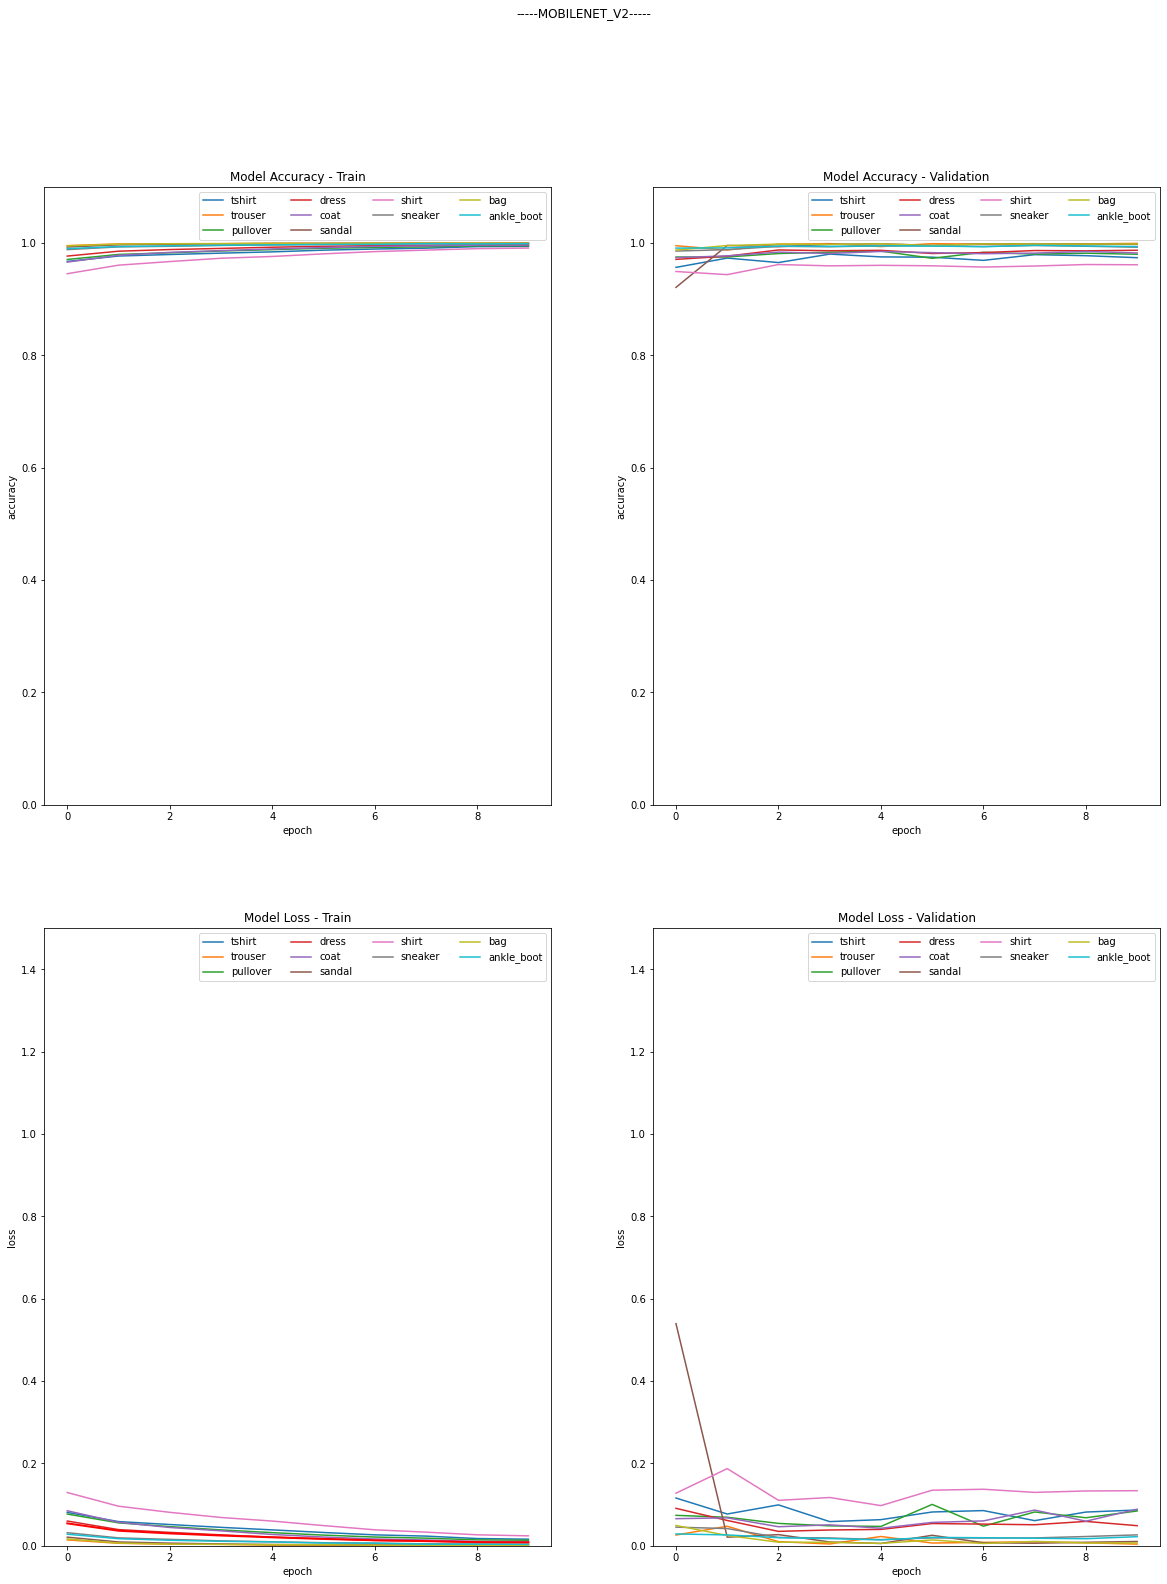

In [16]:
runner.draw_training_history()

# Load Best Model

In [17]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [18]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

In [19]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
375/375 [==============================] - 9s 22ms/step
Prediction finished!
  Task  0: tshirt          | EER_mean: 0.03070 | EER_interp: 0.03080 | ACC: 0.96920
  Task  1: trouser         | EER_mean: 0.00330 | EER_interp: 0.00240 | ACC: 0.99830
  Task  2: pullover        | EER_mean: 0.02860 | EER_interp: 0.02810 | ACC: 0.97230
  Task  3: dress           | EER_mean: 0.01740 | EER_interp: 0.01730 | ACC: 0.98270
  Task  4: coat            | EER_mean: 0.02880 | EER_interp: 0.02880 | ACC: 0.97120
  Task  5: sandal          | EER_mean: 0.00330 | EER_interp: 0.00320 | ACC: 0.99680
  Task  6: shirt           | EER_mean: 0.05820 | EER_interp: 0.05820 | ACC: 0.94180
  Task  7: sneaker         | EER_mean: 0.00650 | EER_interp: 0.00640 | ACC: 0.99360
  Task  8: bag             | EER_mean: 0.00350 | EER_interp: 0.00340 | ACC: 0.99650
  Task  9: ankle_boot      | EER_mean: 0.00790 | EER_interp: 0.00780 | ACC: 0.99220
final_EER_mean: 1.86% | final_EER_media

## Test Split

In [20]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
313/313 [==============================] - 7s 23ms/step  - ETA
Prediction finished!
  Task  0: tshirt          | EER_mean: 0.03300 | EER_interp: 0.03300 | ACC: 0.96710
  Task  1: trouser         | EER_mean: 0.00600 | EER_interp: 0.00600 | ACC: 0.99400
  Task  2: pullover        | EER_mean: 0.03740 | EER_interp: 0.03720 | ACC: 0.96260
  Task  3: dress           | EER_mean: 0.02070 | EER_interp: 0.02040 | ACC: 0.97940
  Task  4: coat            | EER_mean: 0.03070 | EER_interp: 0.03080 | ACC: 0.96930
  Task  5: sandal          | EER_mean: 0.00400 | EER_interp: 0.00400 | ACC: 0.99590
  Task  6: shirt           | EER_mean: 0.05810 | EER_interp: 0.05800 | ACC: 0.94190
  Task  7: sneaker         | EER_mean: 0.00860 | EER_interp: 0.00880 | ACC: 0.99140
  Task  8: bag             | EER_mean: 0.00310 | EER_interp: 0.00300 | ACC: 0.99690
  Task  9: ankle_boot      | EER_mean: 0.01180 | EER_interp: 0.01190 | ACC: 0.98820
final_EER_mean: 2.13% | final_EE

# Visualize Model Classification

# Finishing Experiment Manager

In [21]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 38569 operations to synchronize with Neptune. Do not kill this process.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Still waiting for the remaining 38569 operations (0.00% done). Please wait.
Stil

# Testing Network Modification

# Test - Customized Loss Function

# Test - 